In [62]:
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib.pylab import plt

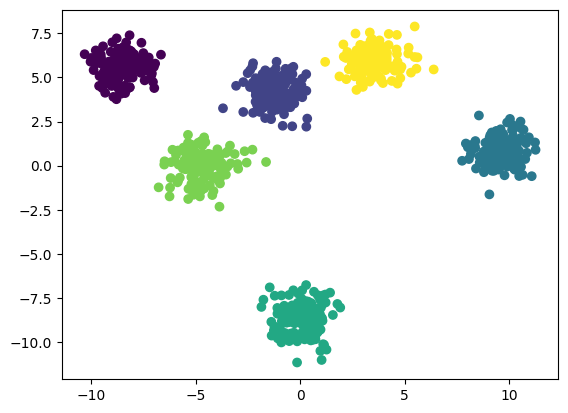

In [63]:
X, y = make_blobs(n_samples=1000, centers=6, n_features=2, cluster_std=0.8, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test =torch.from_numpy(y_test ).long()

In [64]:
class classifier(nn.Module):
    def __init__(self, input_features, output_features, hidden_features):
        super().__init__()
        self.linear = nn.Linear(input_features, hidden_features)
        self.linear2 = nn.Linear(hidden_features,hidden_features)
        self.linear3 = nn.Linear(hidden_features, hidden_features)
        self.linear4 = nn.Linear(hidden_features, hidden_features)
        self.linear5 = nn.Linear(hidden_features, hidden_features)
        self.linear6 = nn.Linear(hidden_features, output_features)
        self.reLU= nn.ReLU()
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear6(self.reLU(self.linear5(self.reLU(self.linear4(self.reLU(self.linear3(self.reLU(self.linear2(self.reLU(self.linear(x)))))))))))

In [65]:
model = classifier(2, 6, 64)
model

classifier(
  (linear): Linear(in_features=2, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=64, bias=True)
  (linear6): Linear(in_features=64, out_features=6, bias=True)
  (reLU): ReLU()
)

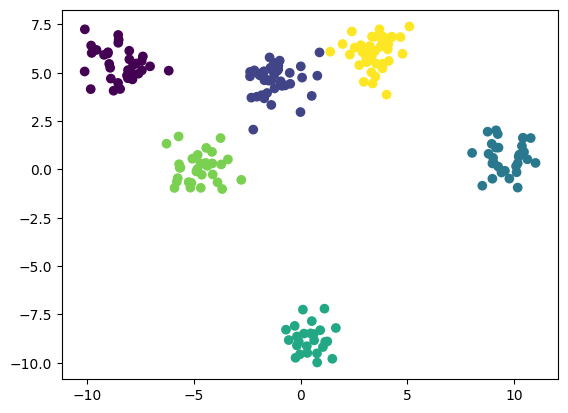

In [69]:
model.eval()
with torch.inference_mode():
    predictions = model(X_test)
    predictions = torch.round(predictions)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=torch.argmax(predictions, dim=1) )
    plt.show()

In [ ]:
def trainer(epochs,model, loss_fn, optimizer, X_train, y_train) -> None:
    for epoch in range(epochs):
        model.train()
        predictions = model(X_train)
        loss = loss_fn(predictions, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"{epoch} {loss}")

In [68]:
LEARNING_RATE = 0.01

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
trainer(epochs=4000, model=model, loss_fn=loss_fn, optimizer=optimizer, X_train=X_train, y_train=y_train)

0 1.8080339431762695
100 1.7325828075408936
200 1.5239520072937012
300 0.9268625378608704
400 0.49389517307281494
500 0.17322726547718048
600 0.070151187479496
700 0.0396050289273262
800 0.027106286957859993
900 0.020675674080848694
1000 0.016828615218400955
1100 0.014301839284598827
1200 0.012514669448137283
1300 0.011182347312569618
1400 0.01015032920986414
1500 0.009325884282588959
1600 0.008650544099509716
1700 0.008085904642939568
1800 0.007606878411024809
1900 0.007195302285254002
2000 0.006836507935076952
2100 0.0065206545405089855
2200 0.0062401192262768745
2300 0.005988845136016607
2400 0.0057622832246124744
2500 0.005556597840040922
2600 0.005370776634663343
2700 0.005201052408665419
2800 0.005044520366936922
2900 0.004899610765278339
3000 0.004765002988278866
3100 0.0046393368393182755
3200 0.004521709866821766
3300 0.0044113160111010075
3400 0.004307550843805075
3500 0.004209674429148436
3600 0.004117083735764027
3700 0.004029296338558197
3800 0.00394584471359849
3900 0.003